# Measured Temperatures Analysis

First of all, you must import the libraries/modules needed.

In [70]:
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
from calibration_stats import get_cropped_dataset, get_device_name

with open("calibration.json", "r") as f:
    CALIBRATION_DICT = json.load(f)

Then you must run the following block of code which contains some utility functions that will be used in the future.

In [71]:
def compute_dataframes(dataset):
    for mac_addr in dataset.keys():
        calibration = lambda t: t + CALIBRATION_DICT[get_device_name(mac_addr)]
        df = pd.DataFrame(
            data={
                "Timestamp": dataset[mac_addr]["timestamps"],
                "Temperature": list(
                    map(calibration, dataset[mac_addr]["samples"]))
            })

        df.index = df["Timestamp"]
        df_p = df.resample("H").mean()
        df_p.reset_index(level=0, inplace=True)
        dataset[mac_addr]["df"] = df_p


def plot_charts(dataset, mapping):
    for mac_addr in dataset.keys():
        fig, ax = plt.subplots()
        x = dataset[mac_addr]["df"].loc[:, "Timestamp"]
        y = dataset[mac_addr]["df"].loc[:, "Temperature"]

        ax.set_xlabel('Real-Time (1h Intervals)')
        ax.set_ylabel('Avg Measured Temperature (°C)')
        
        name = get_device_name(mac_addr)
        mapping_data = mapping[name]
        mac = f"| MAC: {name} | "
        office = "" if mapping_data["office_num"] is None else f"Office: {mapping_data['office_num']} | "
        desk = "" if mapping_data["desk_num"] is None else f"Desk: {mapping_data['desk_num']} | "        
        label = "" if mapping_data["label"] == "no-label" else f"Label: {mapping_data['label']} |"
        title = f"{mac}{office}{desk}{label}"

        ax.set_title(title)
        
        ax.scatter(x, y, color="orange", edgecolors="black", zorder=3)
        ax.plot(x, y, color="orange")
        
        ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y %Hh'))
        fig.autofmt_xdate()
        
        plt.ticklabel_format(axis="y", useOffset=False)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.show()

Once thats done you need to enter the name of the `.csv` file with the raw data that the motes sent to the manager.
Also you need to provide a mapping json that will asign an office/desk/label to each device.

Please enter the raw data file


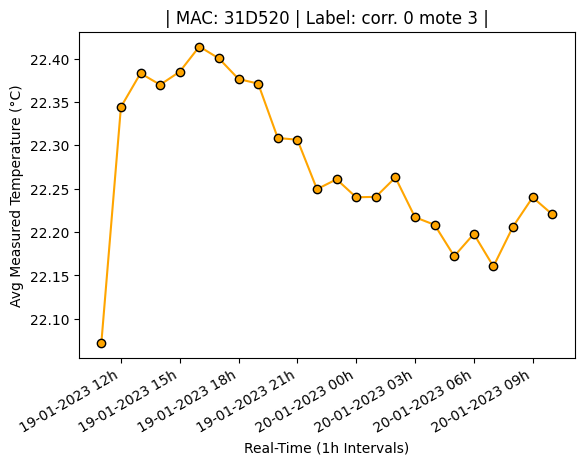

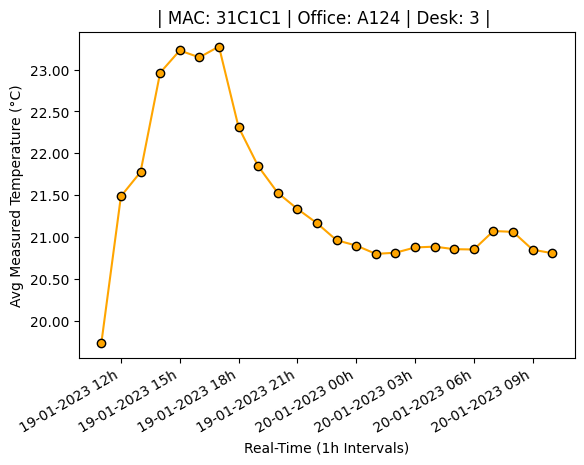

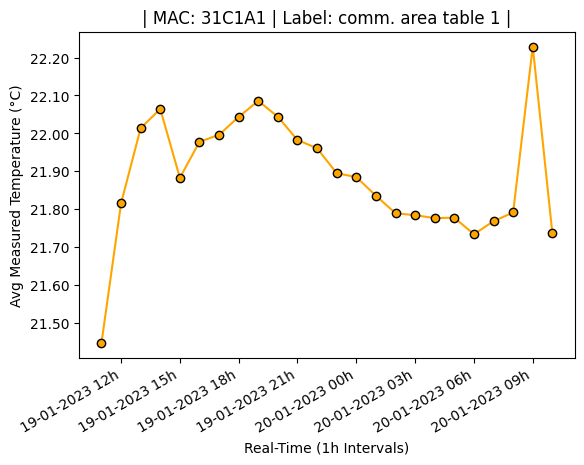

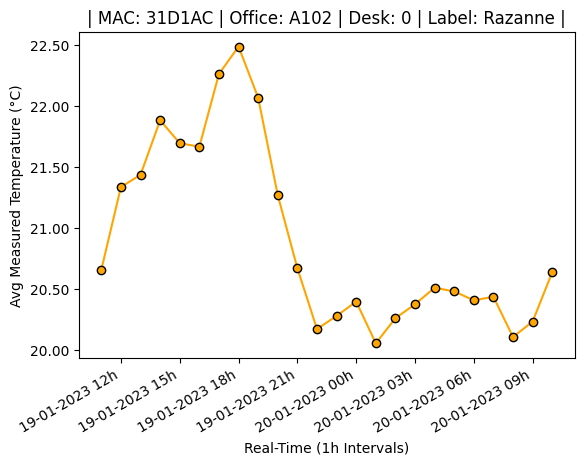

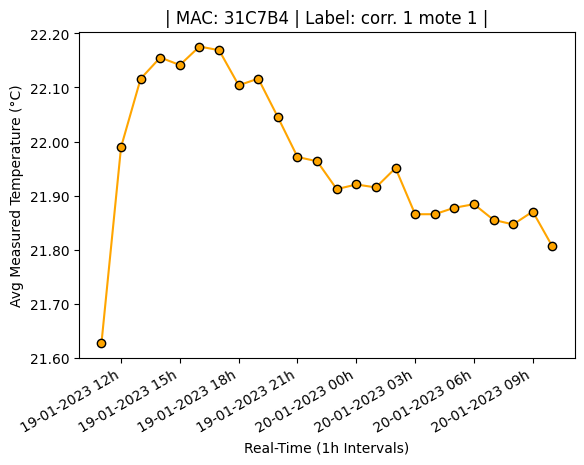

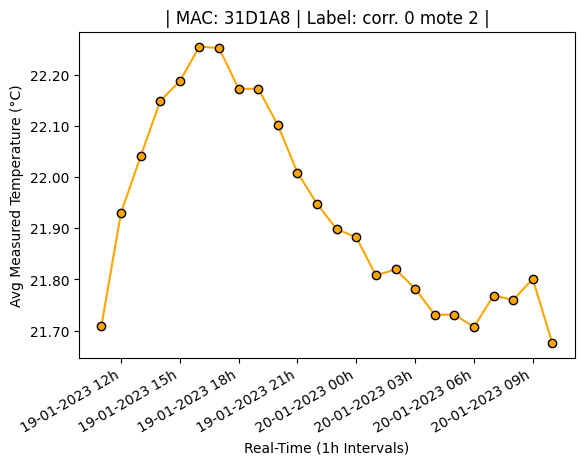

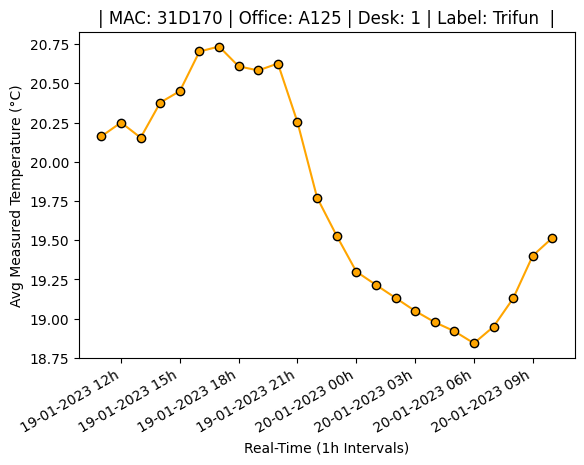

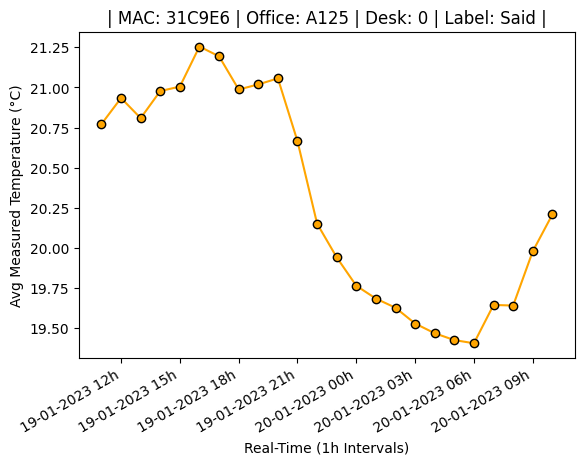

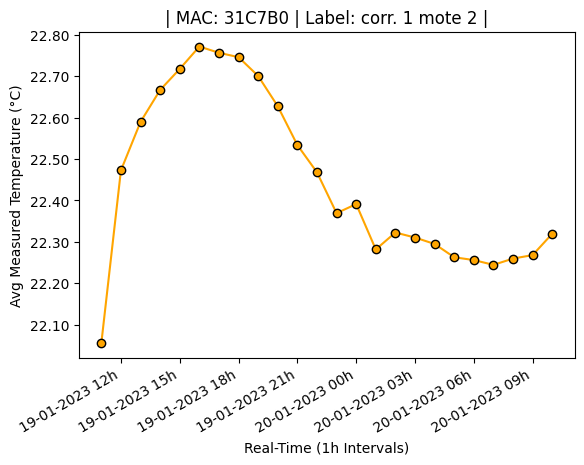

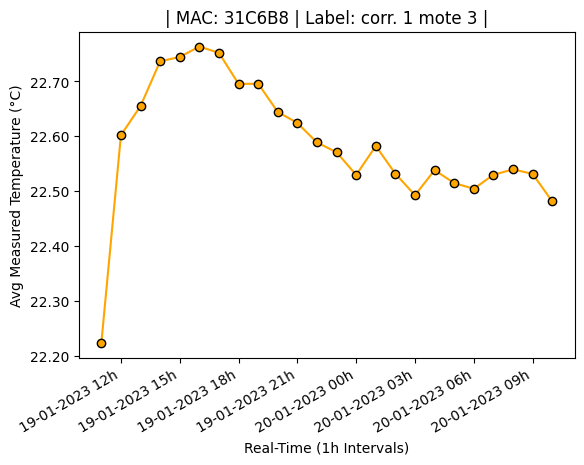

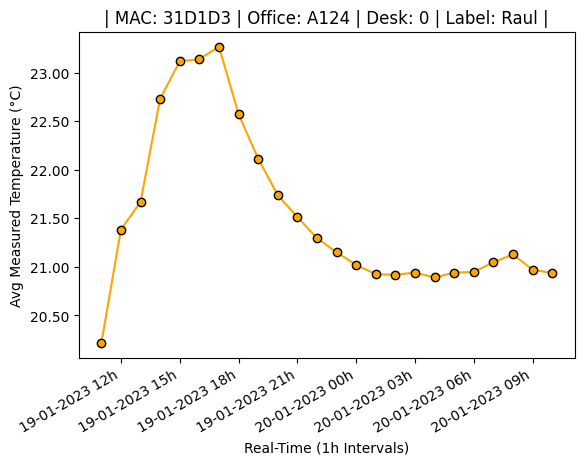

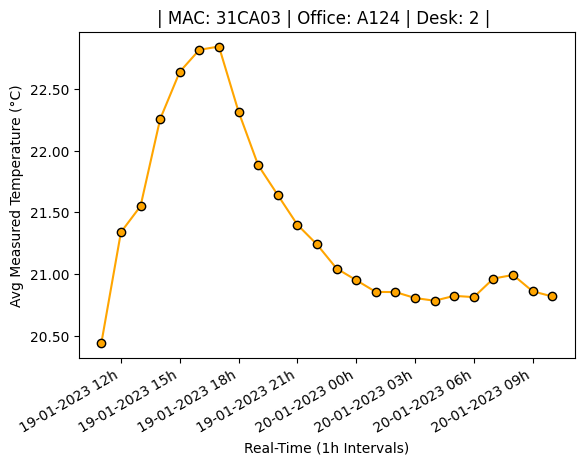

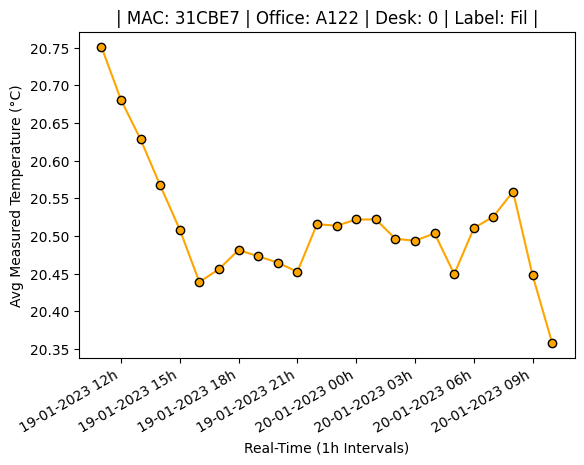

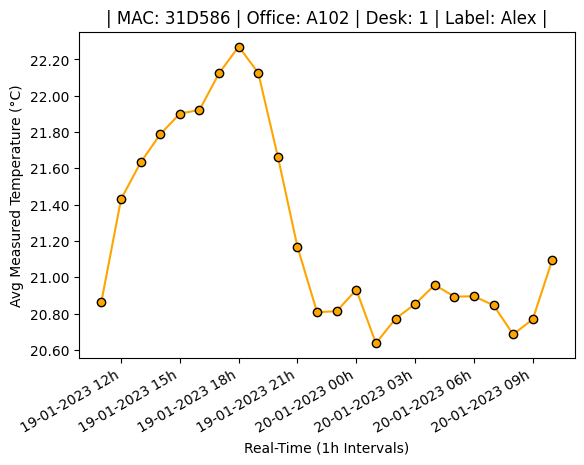

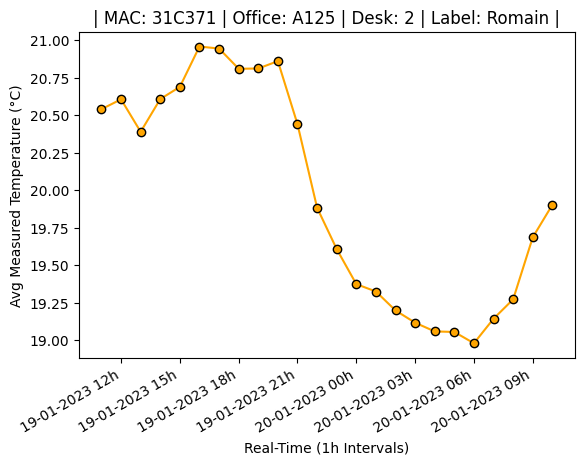

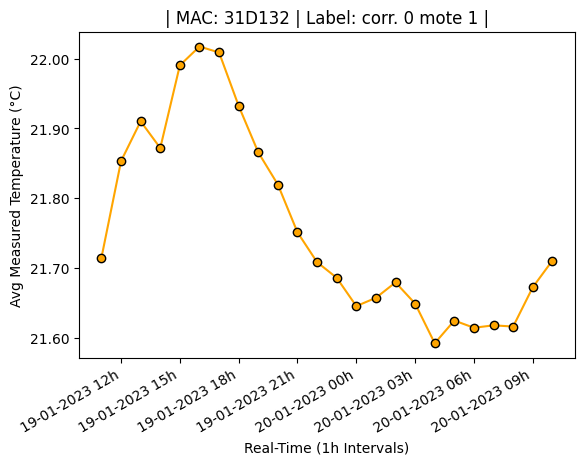

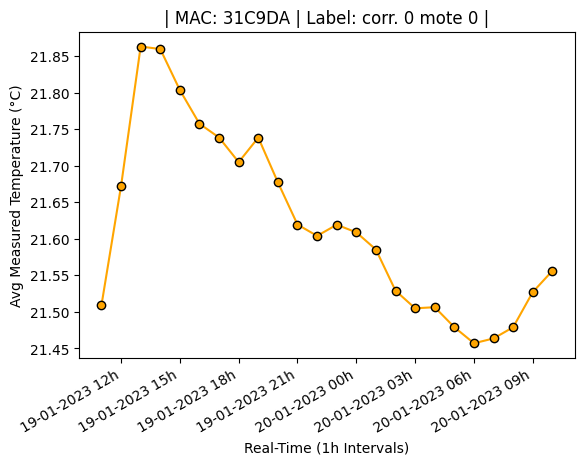

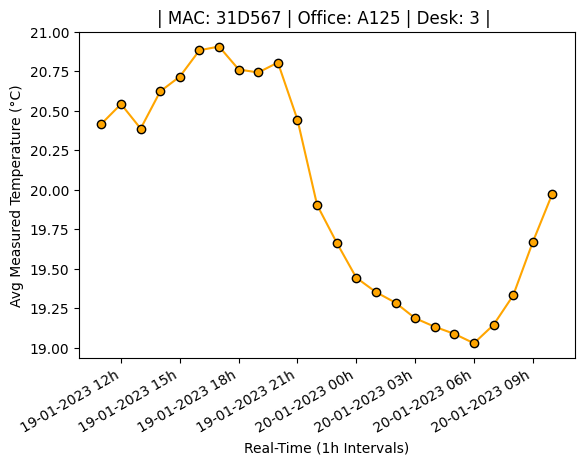

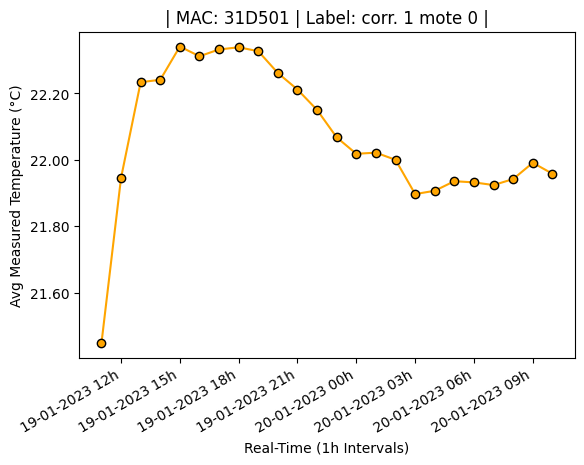

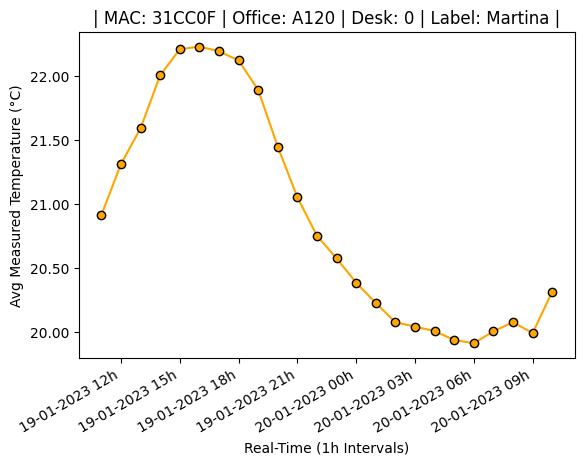

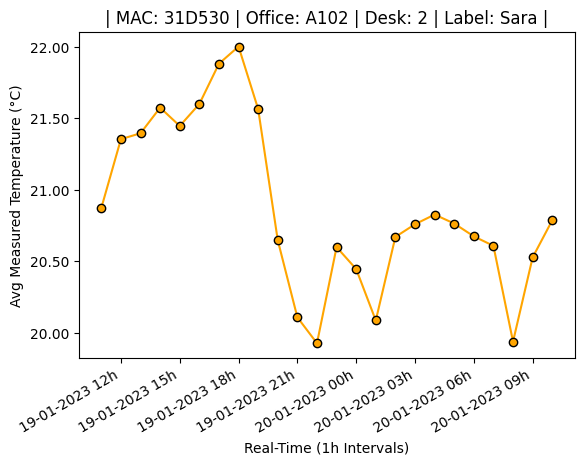

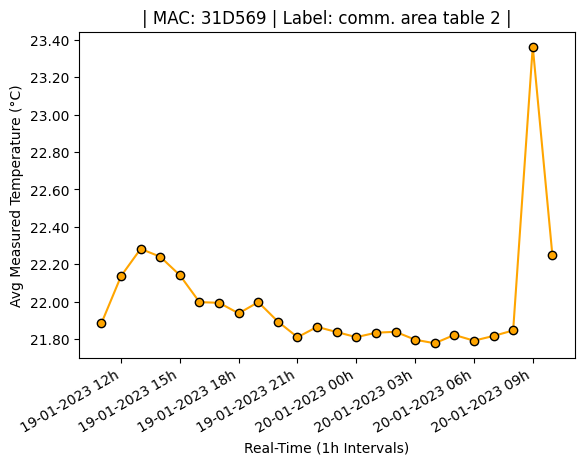

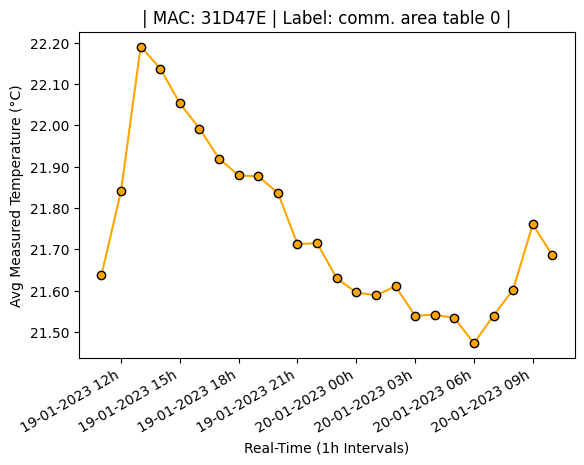

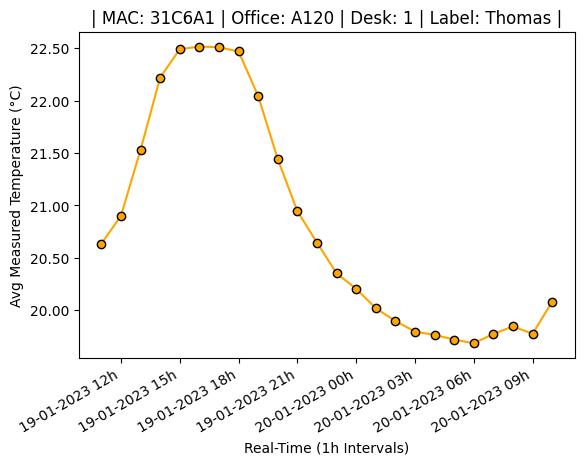

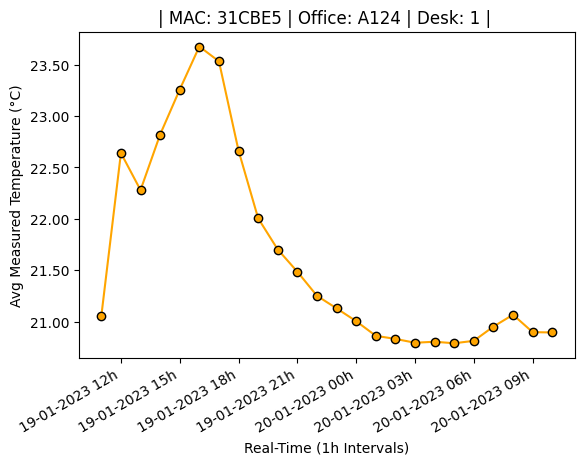

In [72]:
print("Please enter the raw data file")
data_csv = input("raw data?\n>>> ")
with open(input("mapping ?\n>>>"), "r") as f:
    mapping = json.load(f)
dataset, _, _ = get_cropped_dataset(filename=data_csv, N=-1)
compute_dataframes(dataset)
plot_charts(dataset, mapping)